## Import packages

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [4]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params as n_counts_simulator
importlib.reload(n_counts_simulator)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params.py'>

In [5]:
log10masses = np.linspace(14, 15.5, num = 4)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)
log10masses_2d = np.stack((log10masses[:-1], log10masses[1:]))

In [6]:
N_countsSimulator = n_counts_simulator.Model(log10masses, z_min, z_max)
N_counts = N_countsSimulator.N_counts.reshape(len(log10masses) - 1, len(z_min))

## Plot the learned posterior
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

(Here I am just uploading posteriors from previous pydelfi runs)

In [7]:
import getdist
from getdist import plots, MCSamples
import matplotlib as mpl
from matplotlib.patches import Ellipse
from scipy.stats import norm

### Load MCMC chains

In [8]:
flat_samples = np.load('flat_samples_3000.npy')
flat_samples = [flat_samples]

In [9]:
mcmc_samples = [MCSamples(samples=s, 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(flat_samples)]

Removed no burn in


In [10]:
flat_samples_s = np.load('flat_samples_1000_seed1.npy')
flat_samples_s = [flat_samples_s]

In [11]:
mcmc_samples_s = [MCSamples(samples=s, 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(flat_samples_s)]

Removed no burn in


## Running pydelfi for a long time

In [12]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_fisher_trial_15000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_fisher_trial_15000sims_3NDEs/posterior_weights.npy')


In [13]:
samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_fisher_covmat = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


In [17]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_10000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_10000sims_3NDEs/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_10k = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_15000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_15000sims_3NDEs/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_15k = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in
Removed no burn in


## As a check, compare DELFI posterior to a posterior from MCMC chain

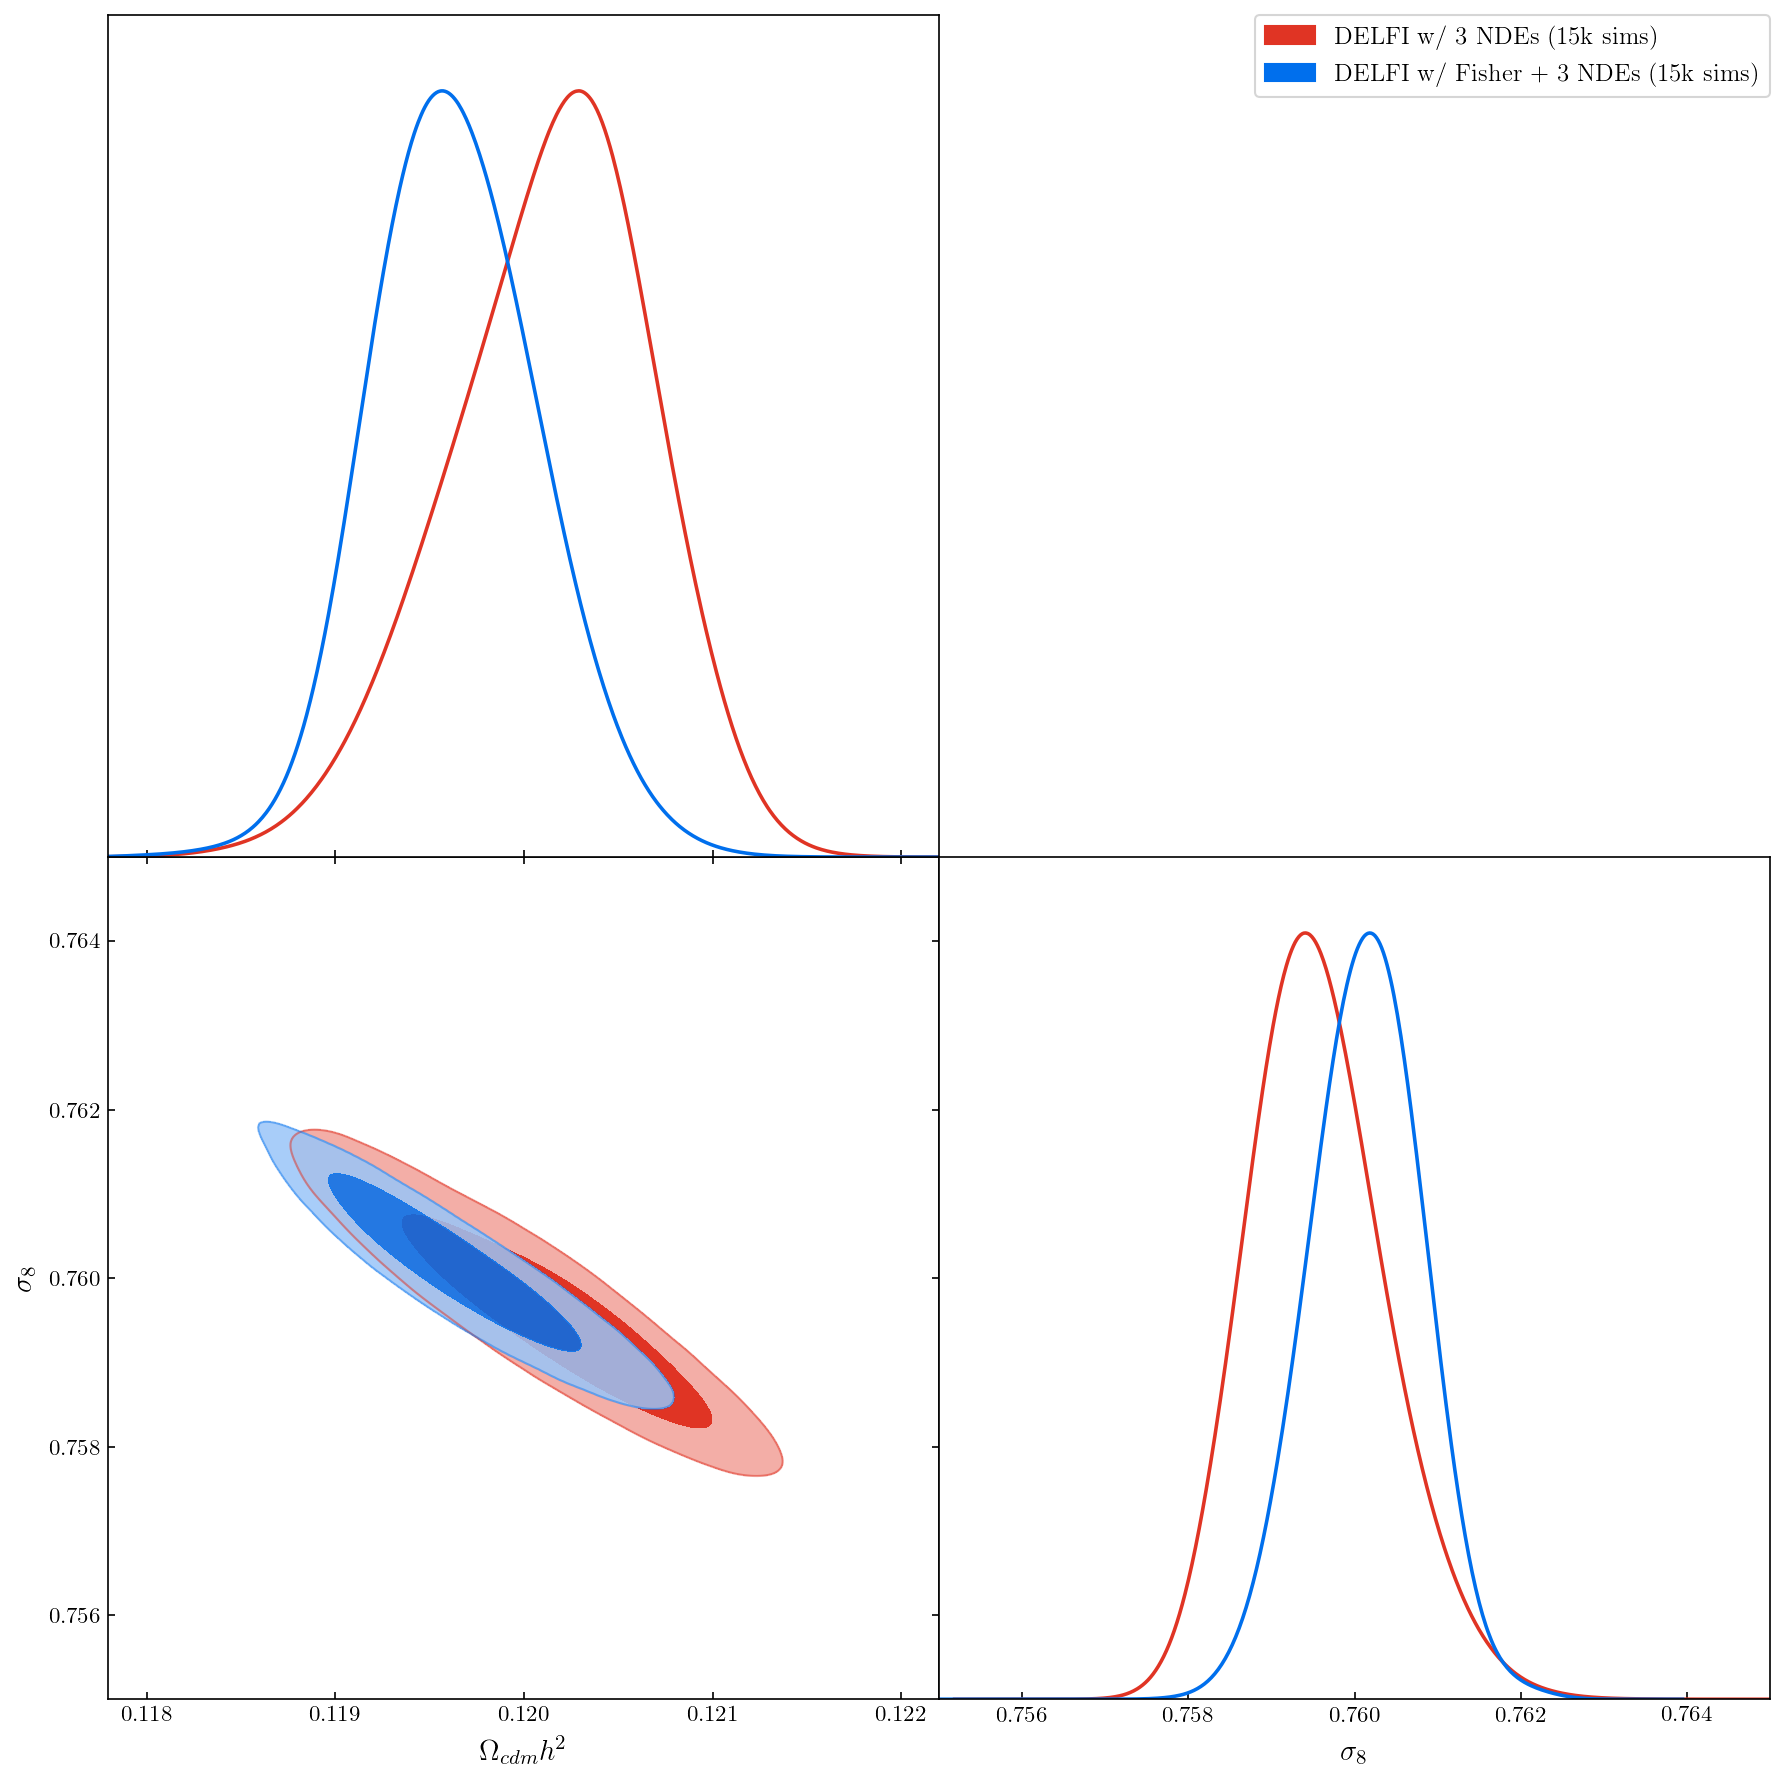

In [18]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([delfi_samples_15k[0], delfi_samples_fisher_covmat[0]], 
                legend_labels = ['DELFI w/ 3 NDEs (15k sims)',
                                 'DELFI w/ Fisher + 3 NDEs (15k sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

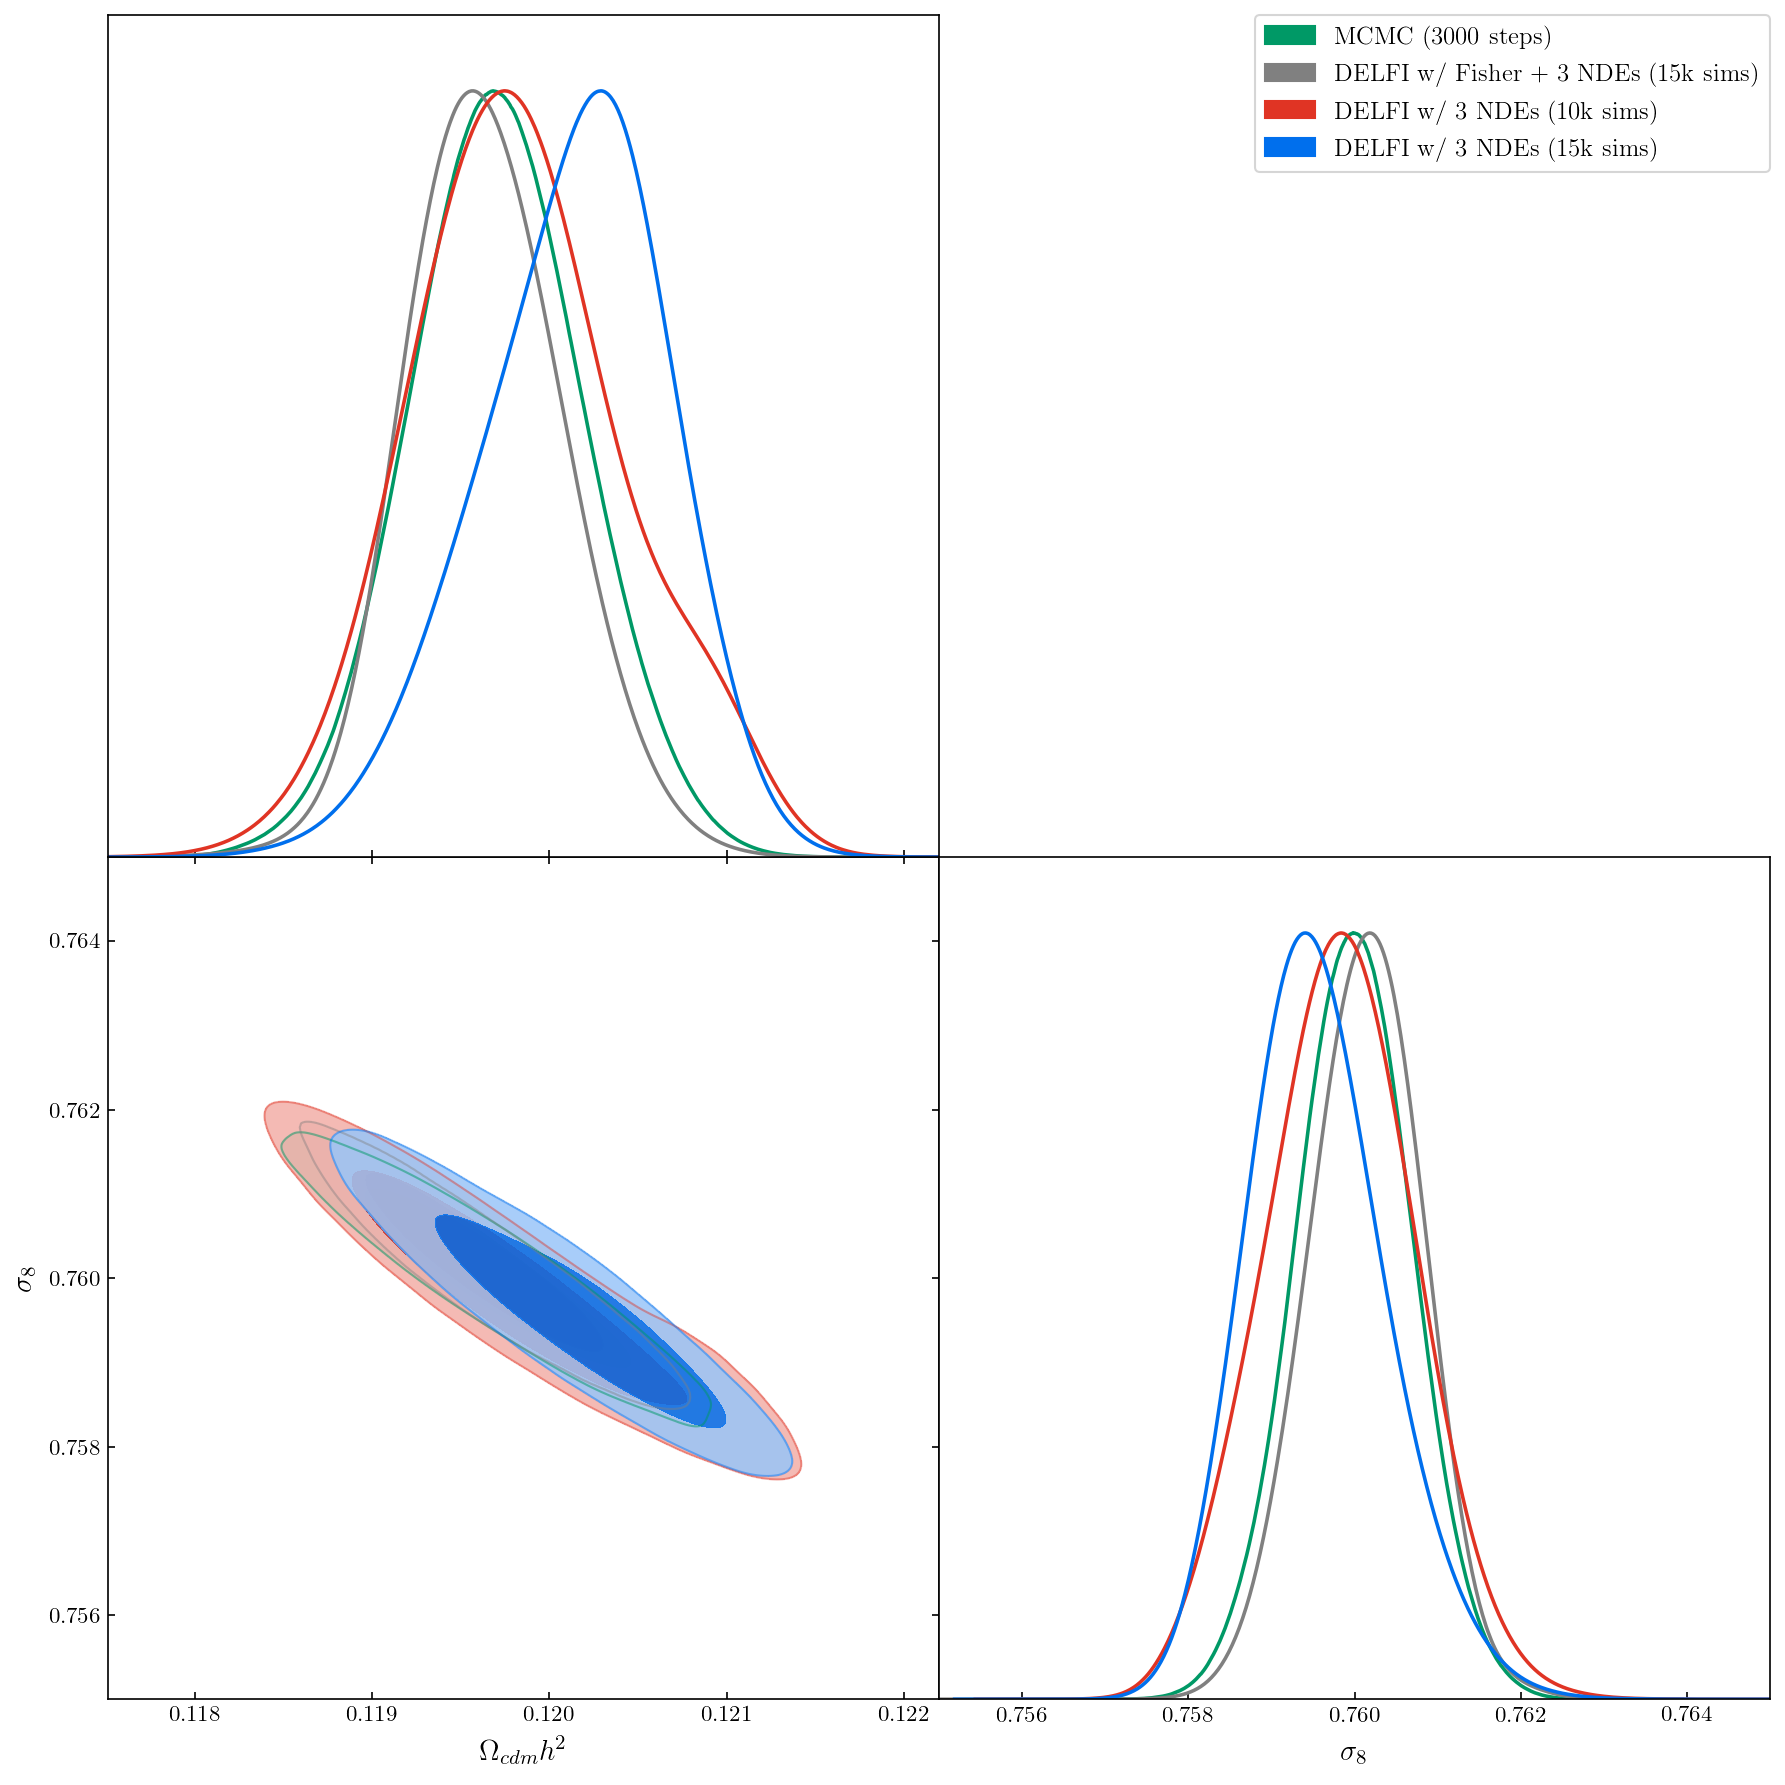

In [27]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples_fisher_covmat[0],
                 delfi_samples_10k[0], delfi_samples_15k[0]], 
                legend_labels = ['MCMC (3000 steps)',
                                 'DELFI w/ Fisher + 3 NDEs (15k sims)',
                                 'DELFI w/ 3 NDEs (10k sims)',
                                 'DELFI w/ 3 NDEs (15k sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

#### Results from simulated data (seed = 1)

In [19]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_seed1_fisher_trial_15000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_seed1_fisher_trial_15000sims_3NDEs/posterior_weights.npy')


In [20]:
samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s_fisher_covmat = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


In [23]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_seed1_10000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_seed1_10000sims_3NDEs/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s_10k = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_seed1_15000sims_3NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_seed1_15000sims_3NDEs/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s_15k = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in
Removed no burn in


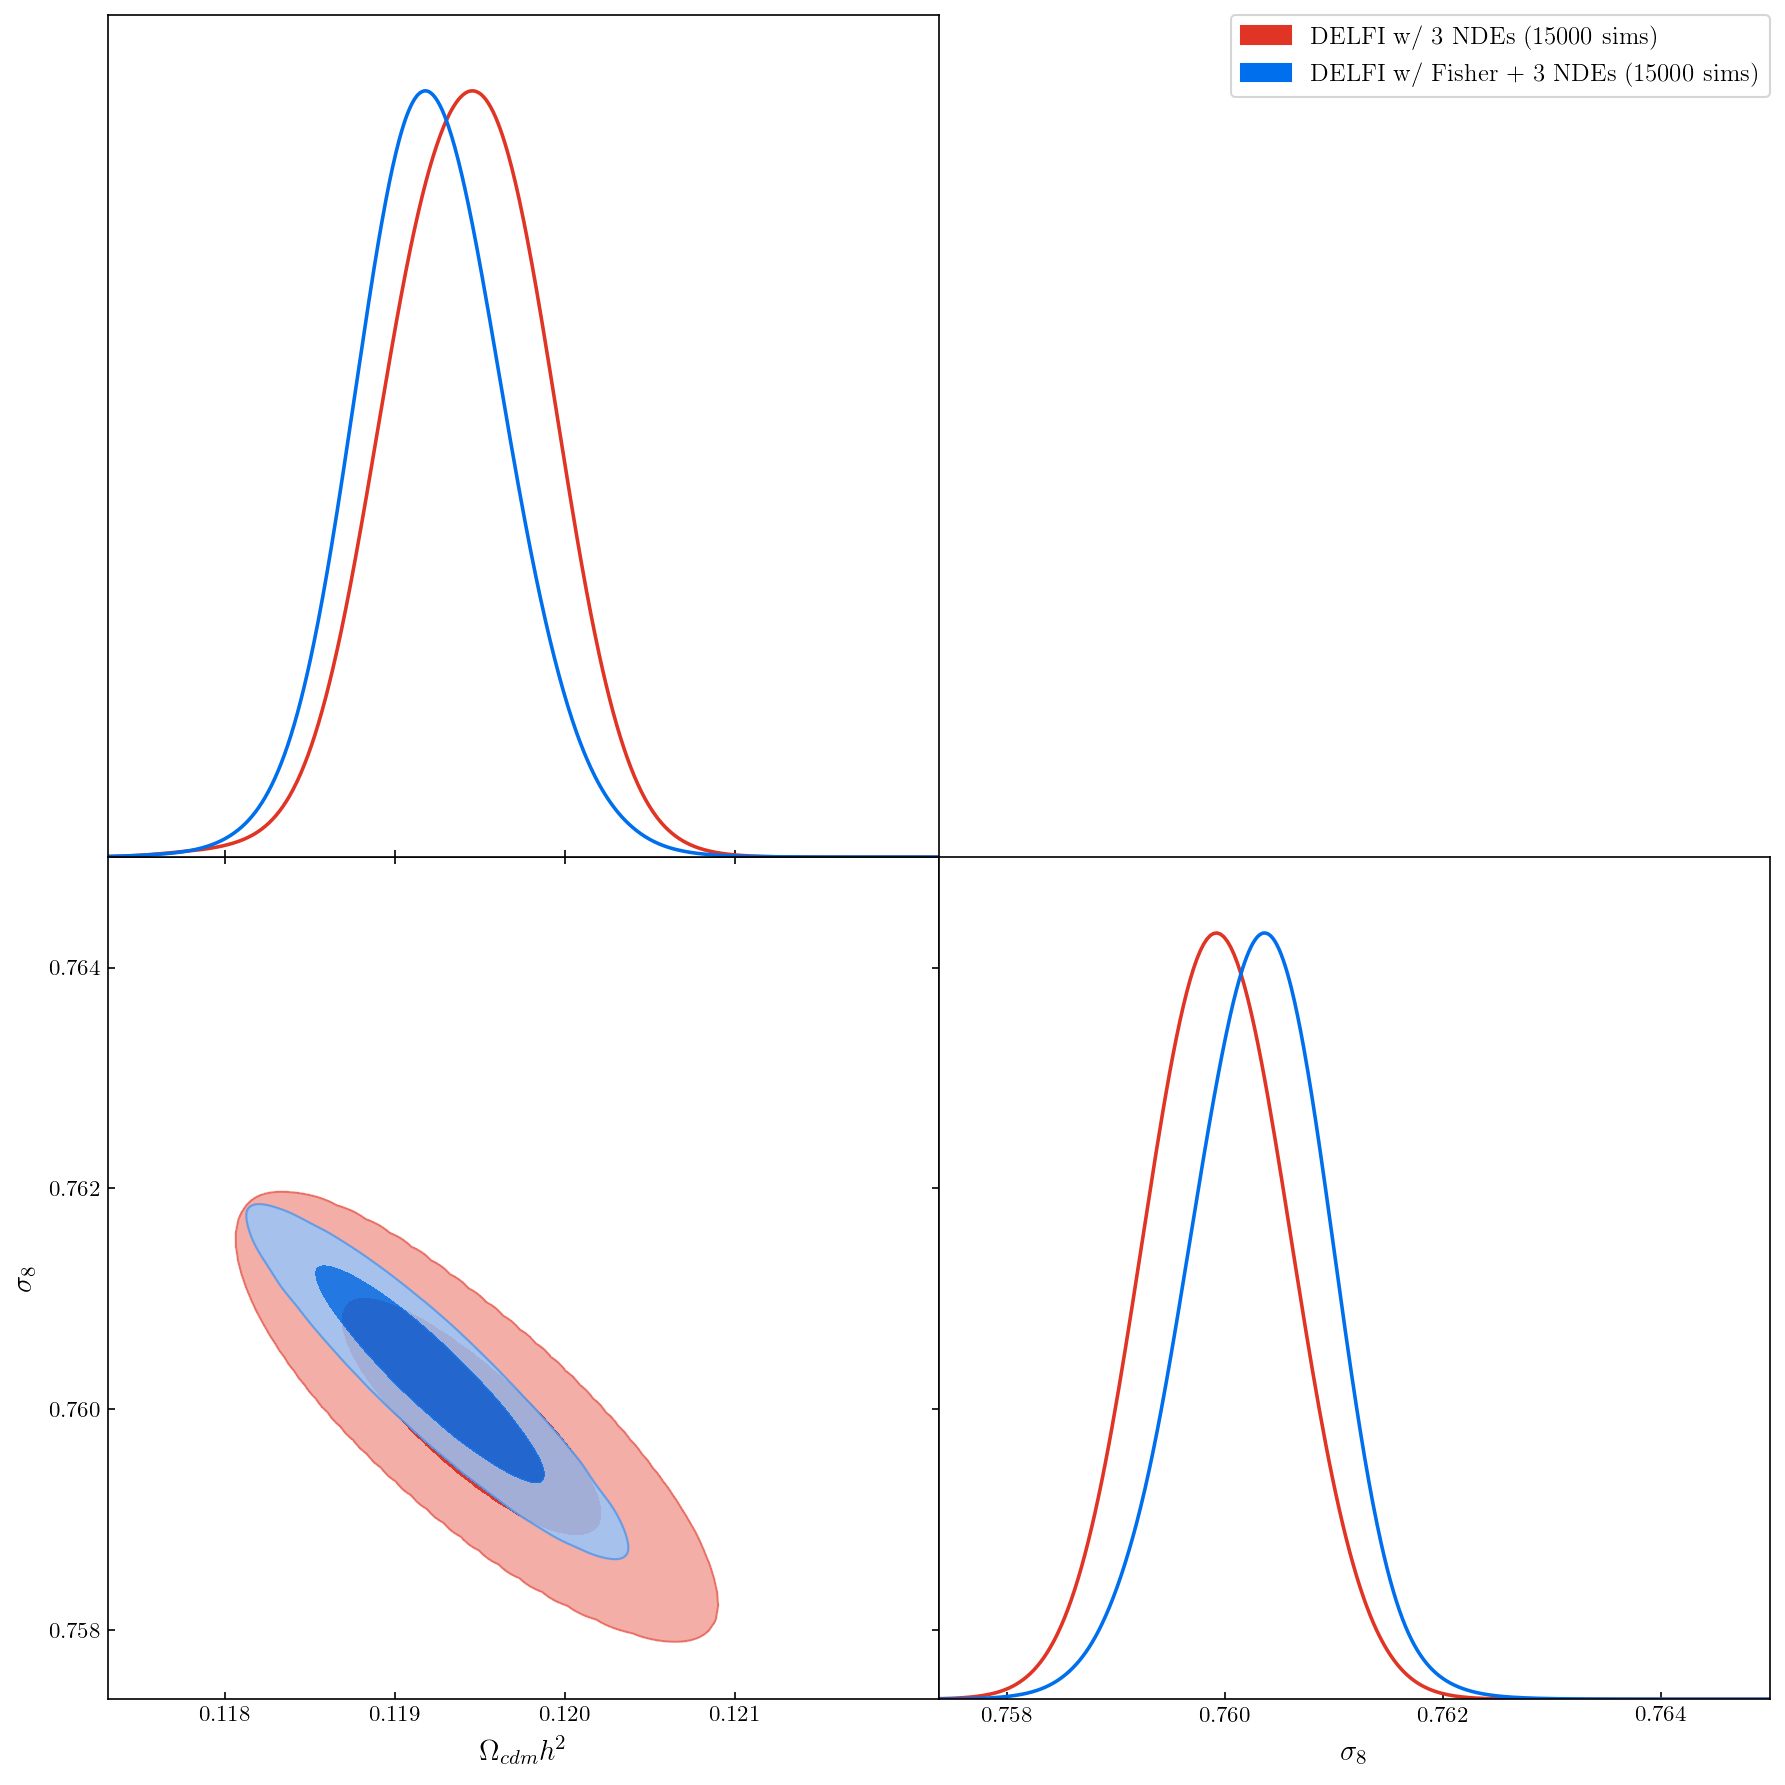

In [24]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([delfi_samples_s_15k[0], delfi_samples_s_fisher_covmat[0]], 
                legend_labels = ['DELFI w/ 3 NDEs (15000 sims)','DELFI w/ 3 NDEs (15000 sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

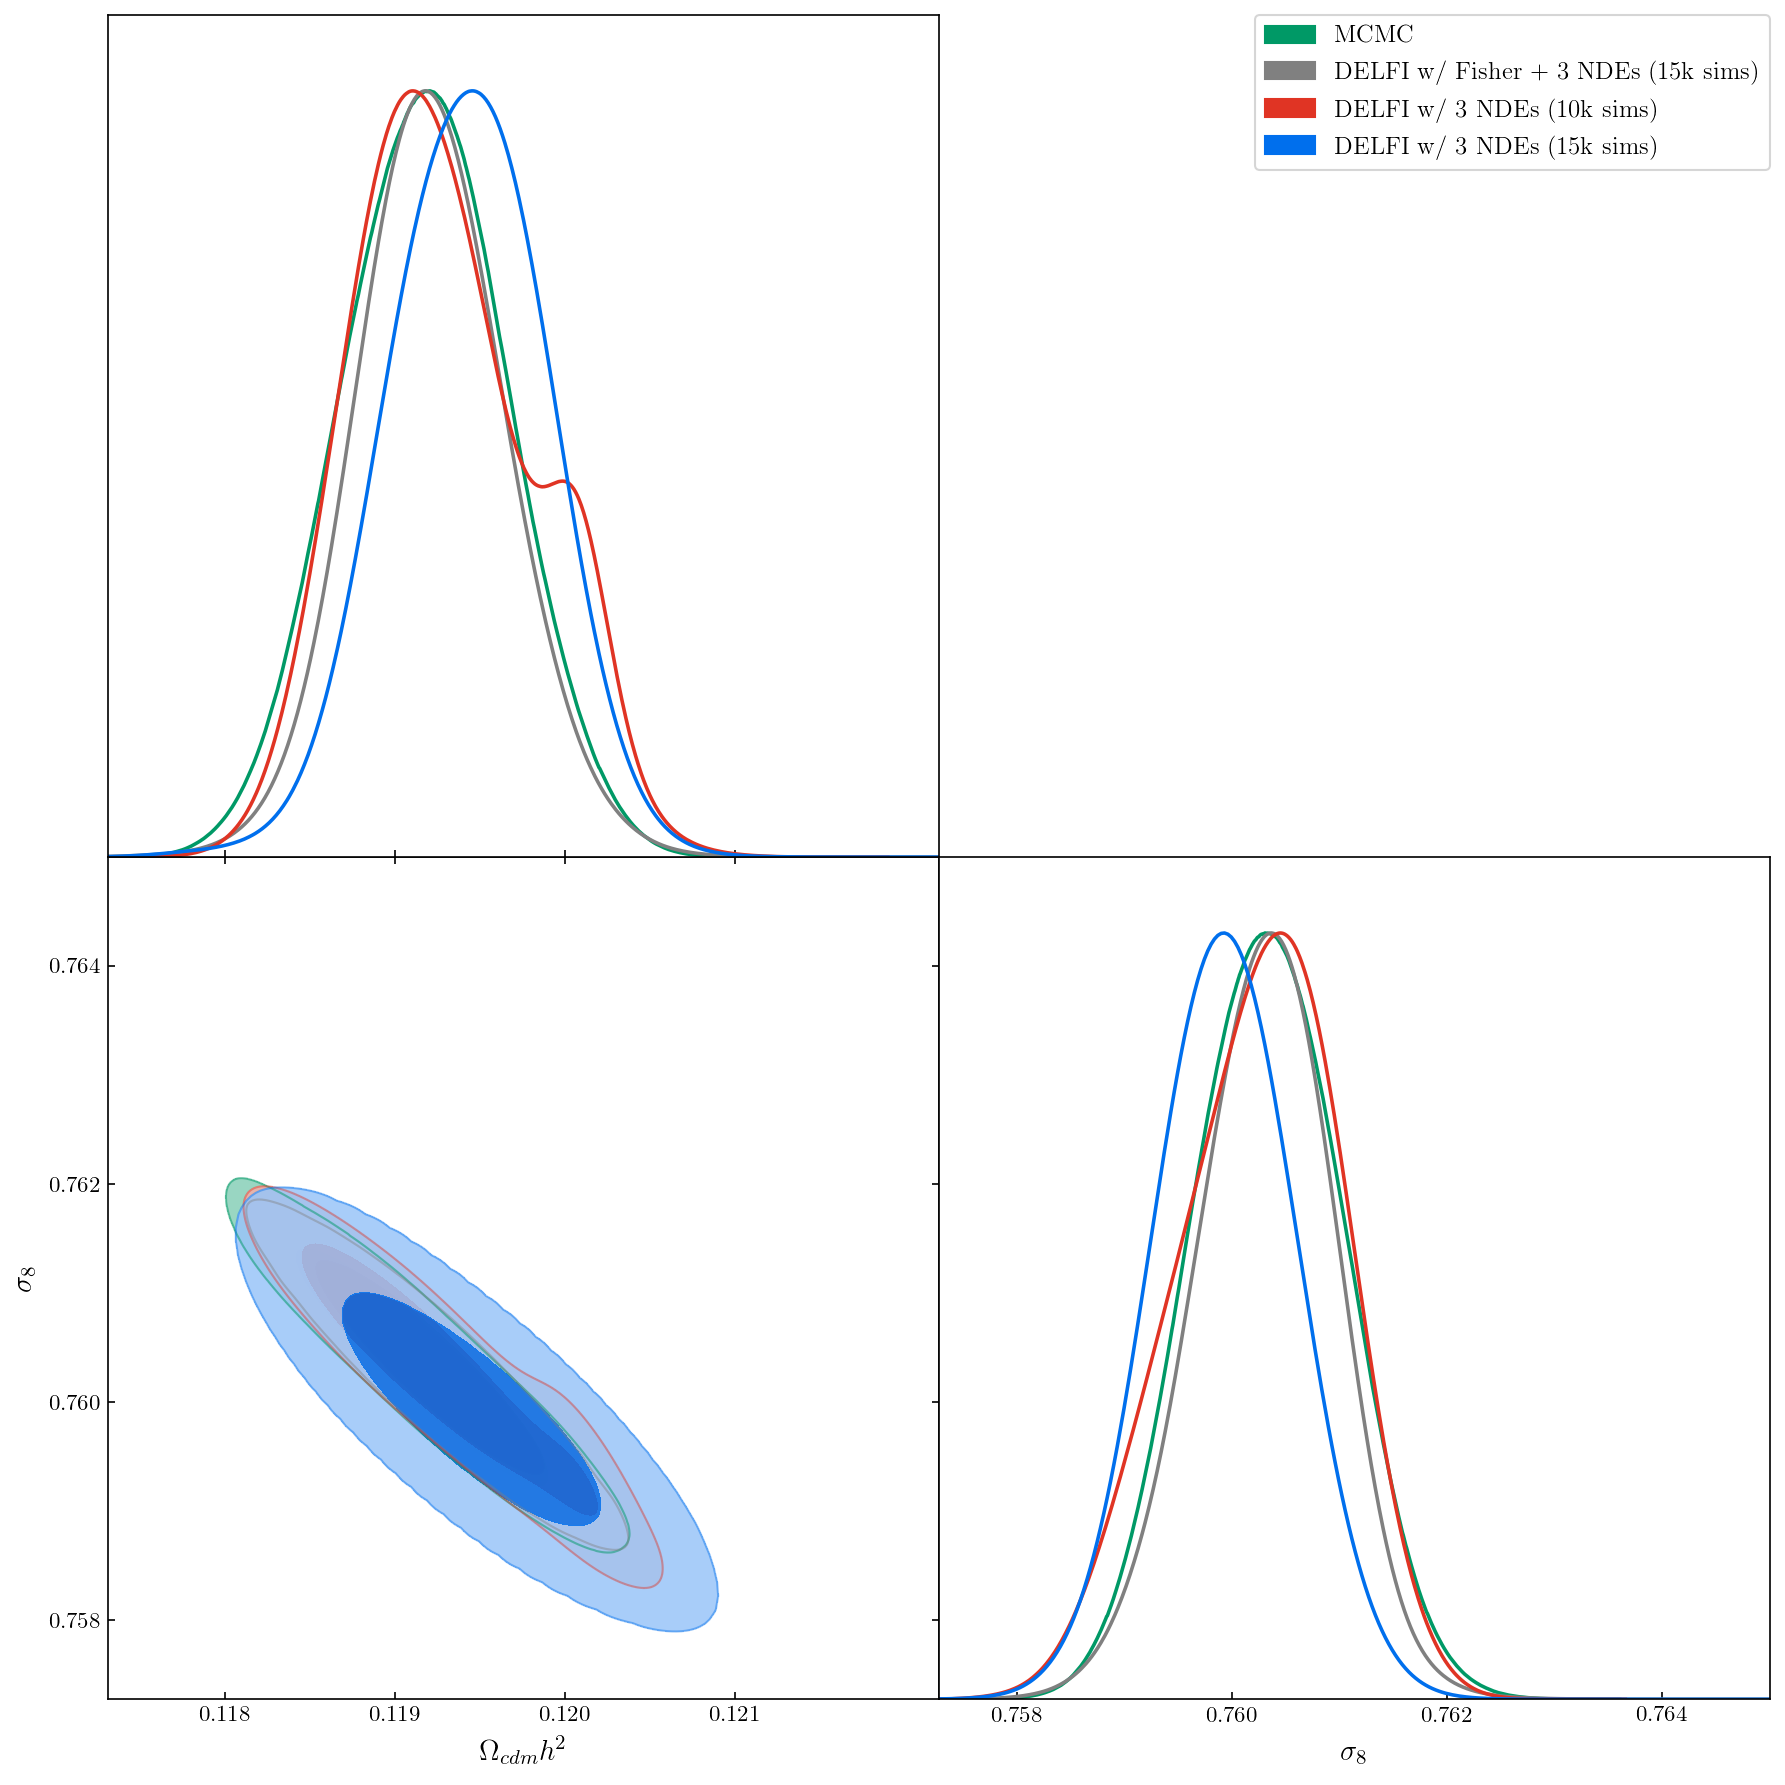

In [24]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_s_fisher_covmat[0], delfi_samples_s_10k[0], delfi_samples_s_15k[0]], 
                legend_labels = ['MCMC','DELFI w/ Fisher + 3 NDEs (15k sims)', 'DELFI w/ 3 NDEs (10k sims)',
                                 'DELFI w/ 3 NDEs (15k sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

## Results with fisher-pretraining

### Fiducial

In [96]:
posterior_samples_fisher_f = np.loadtxt('simulators/mass_function_n_counts/results/results_tinker_2params_fisher_pretraining_fiducial/posterior_samples.npy')
posterior_weights_fisher_f = np.loadtxt('simulators/mass_function_n_counts/results/results_tinker_2params_fisher_pretraining_fiducial/posterior_weights.npy')


In [97]:
samples = [posterior_samples_fisher_f]
weights = [posterior_weights_fisher_f]
delfi_samples_fisher_f = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


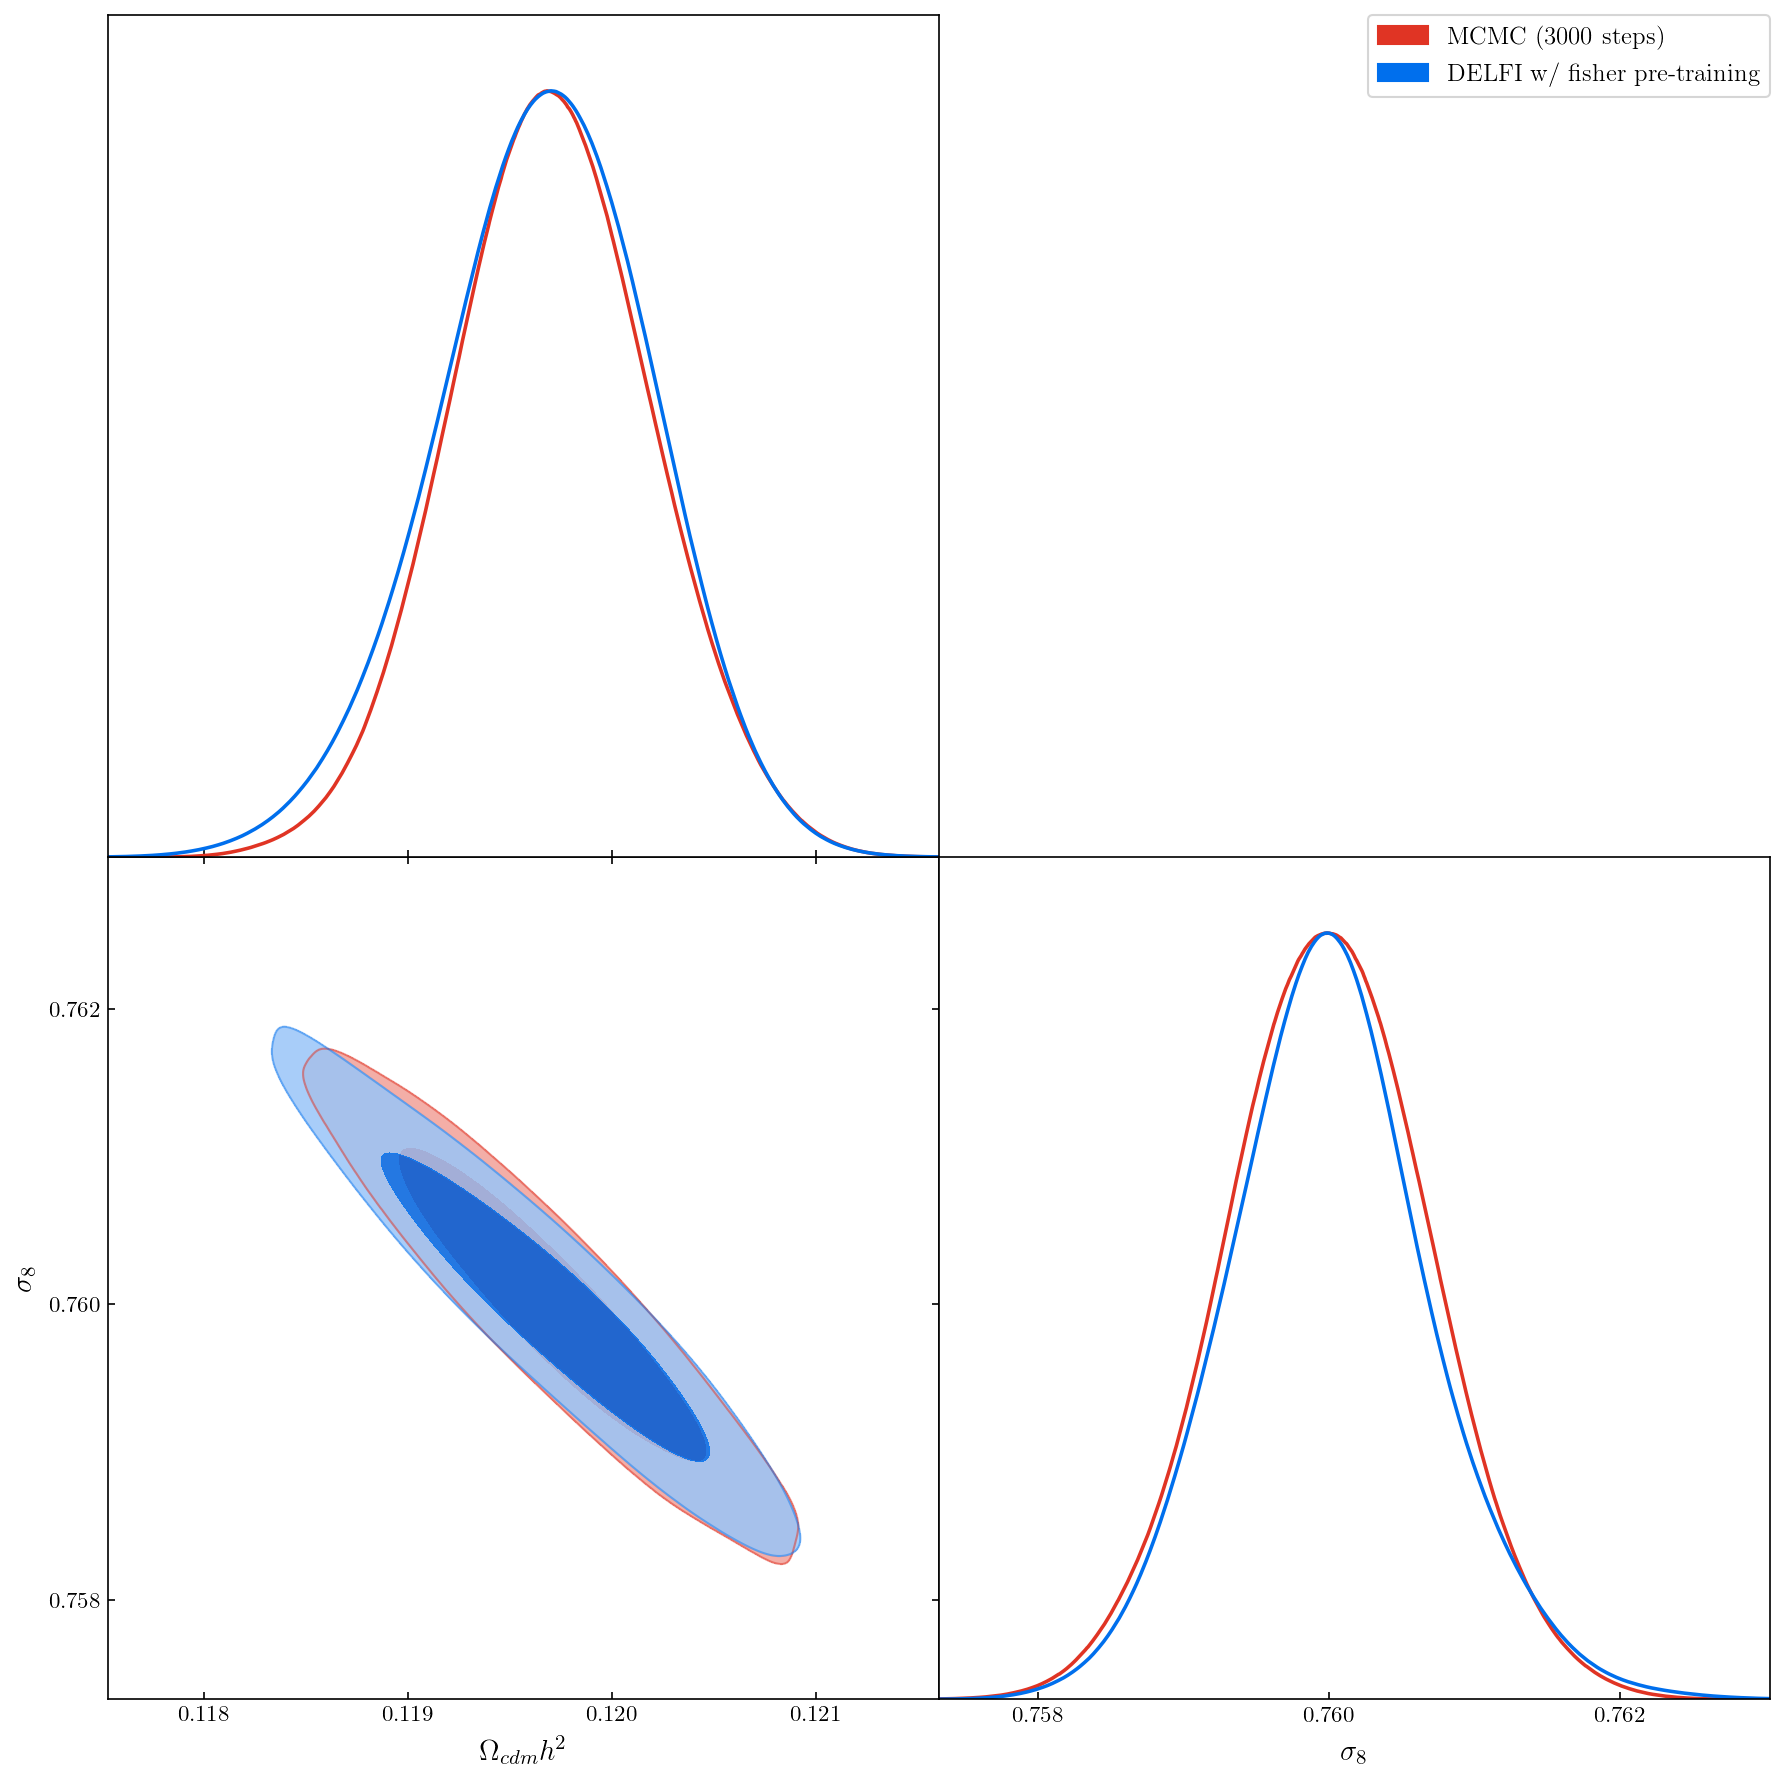

In [99]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples_fisher_f[0]], 
                legend_labels = ['MCMC (3000 steps)','DELFI w/ fisher pre-training'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

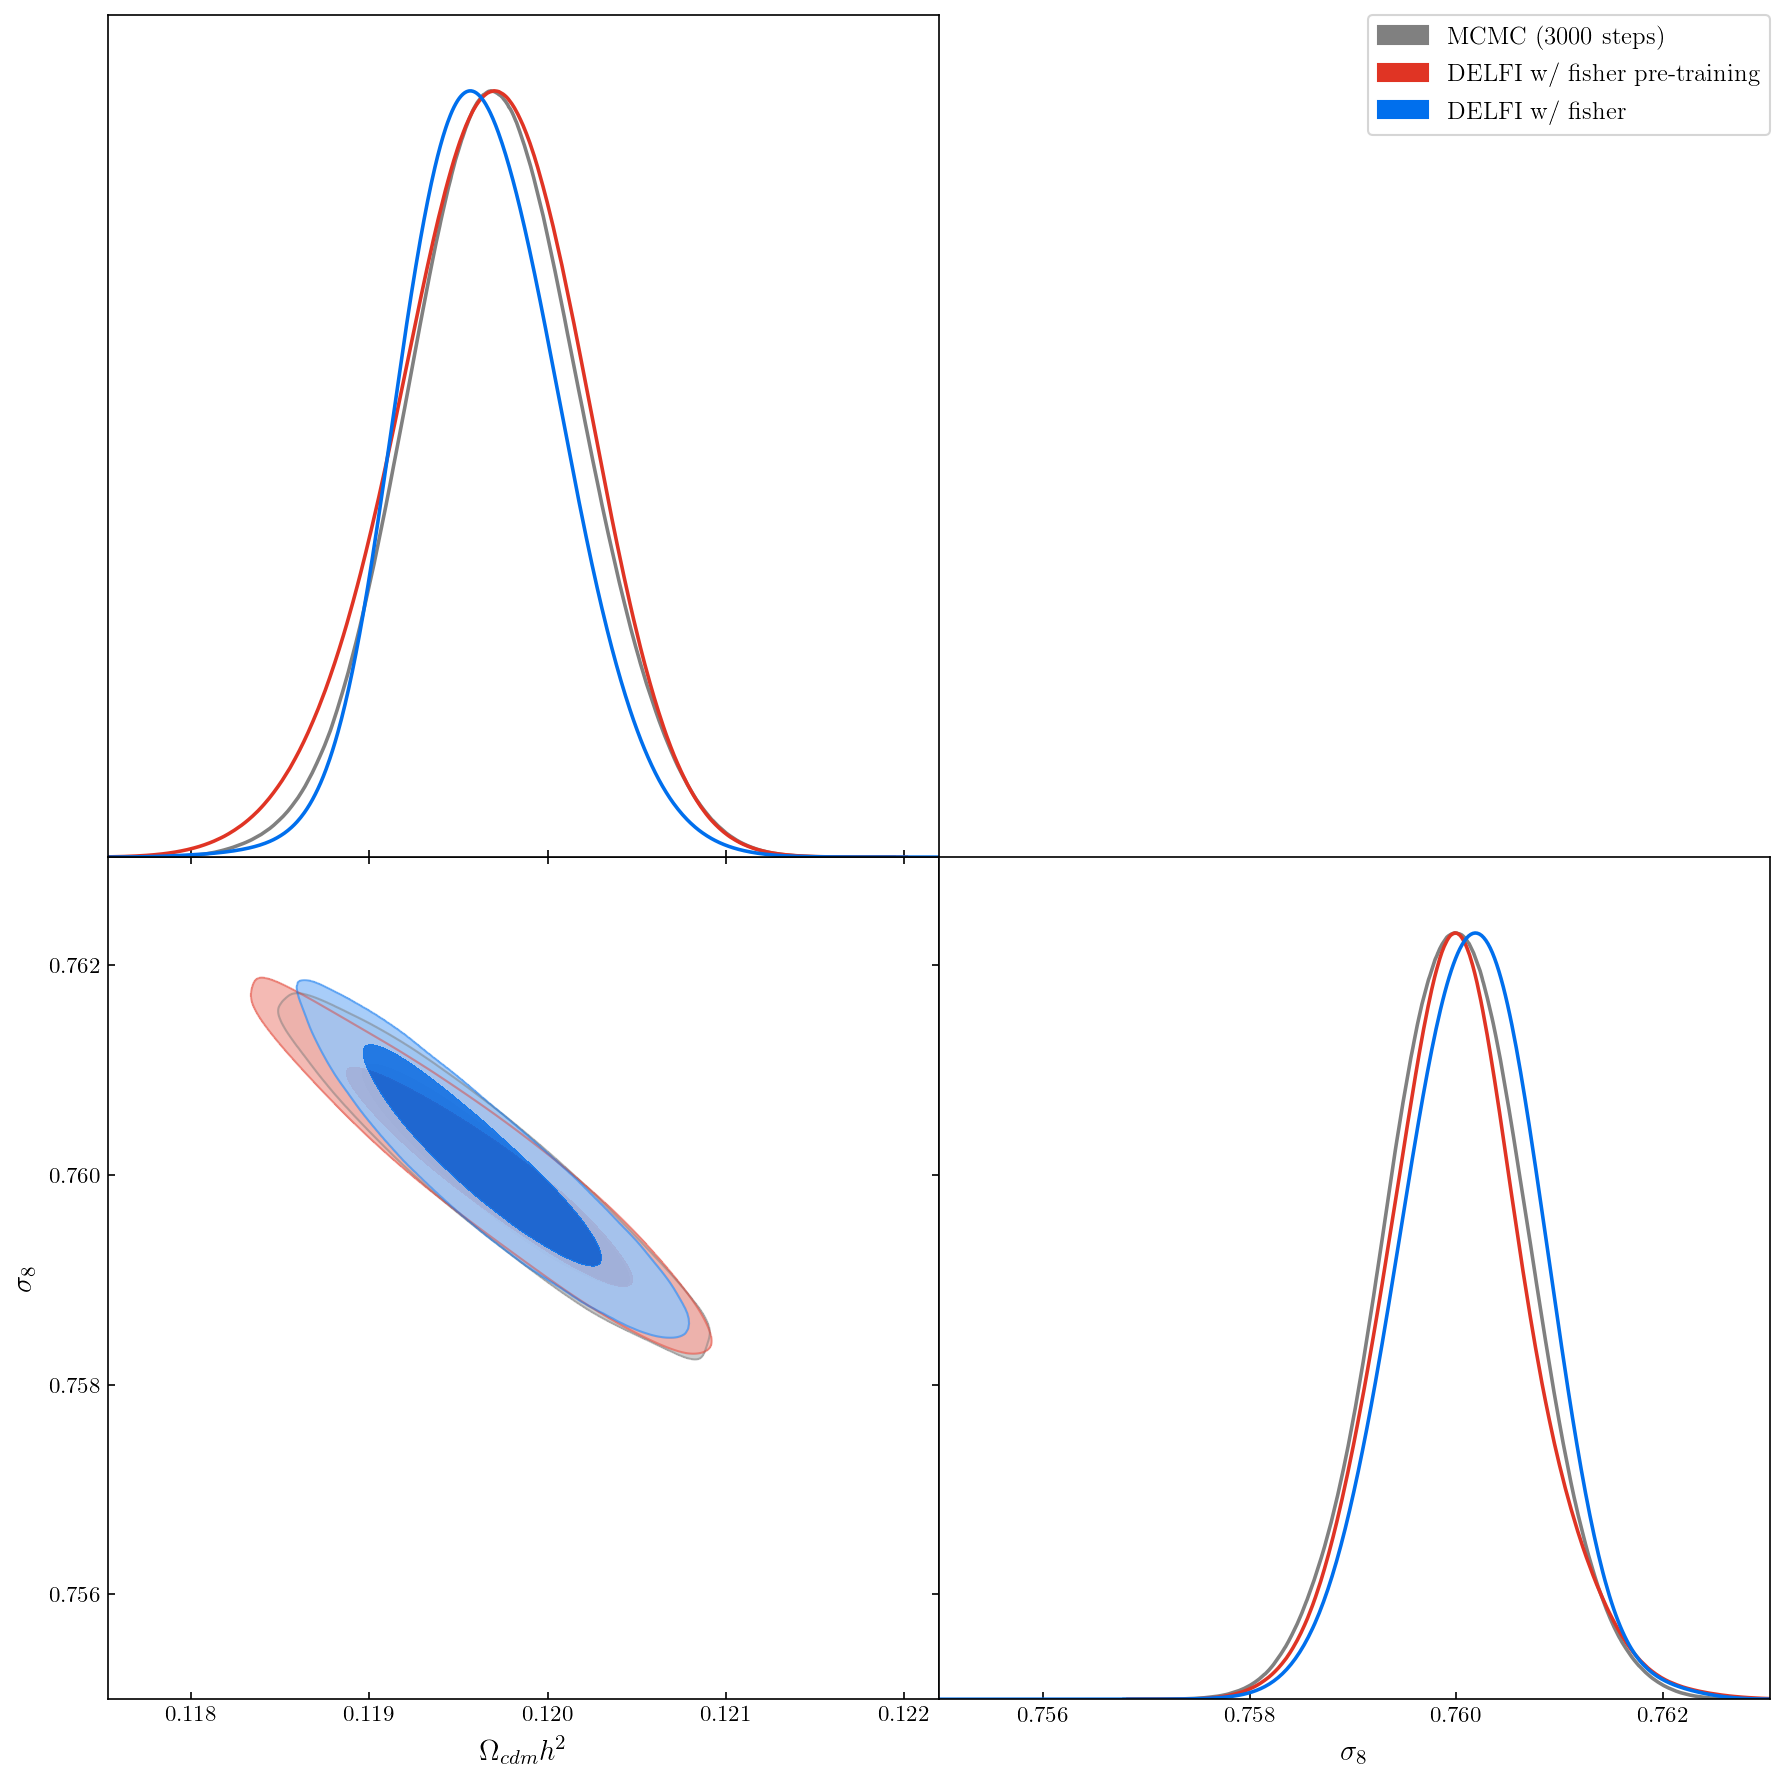

In [104]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples_fisher_f[0], delfi_samples_fisher_covmat[0]], 
                legend_labels = ['MCMC (3000 steps)','DELFI w/ fisher pre-training', 'DELFI w/ fisher'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

### Skewed

In [100]:
posterior_samples_fisher_s = np.loadtxt('simulators/mass_function_n_counts/results/results_tinker_2params_fisher_pretraining/posterior_samples.npy')
posterior_weights_fisher_s = np.loadtxt('simulators/mass_function_n_counts/results/results_tinker_2params_fisher_pretraining/posterior_weights.npy')


In [101]:
samples = [posterior_samples_fisher_s]
weights = [posterior_weights_fisher_s]
delfi_samples_fisher_s = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


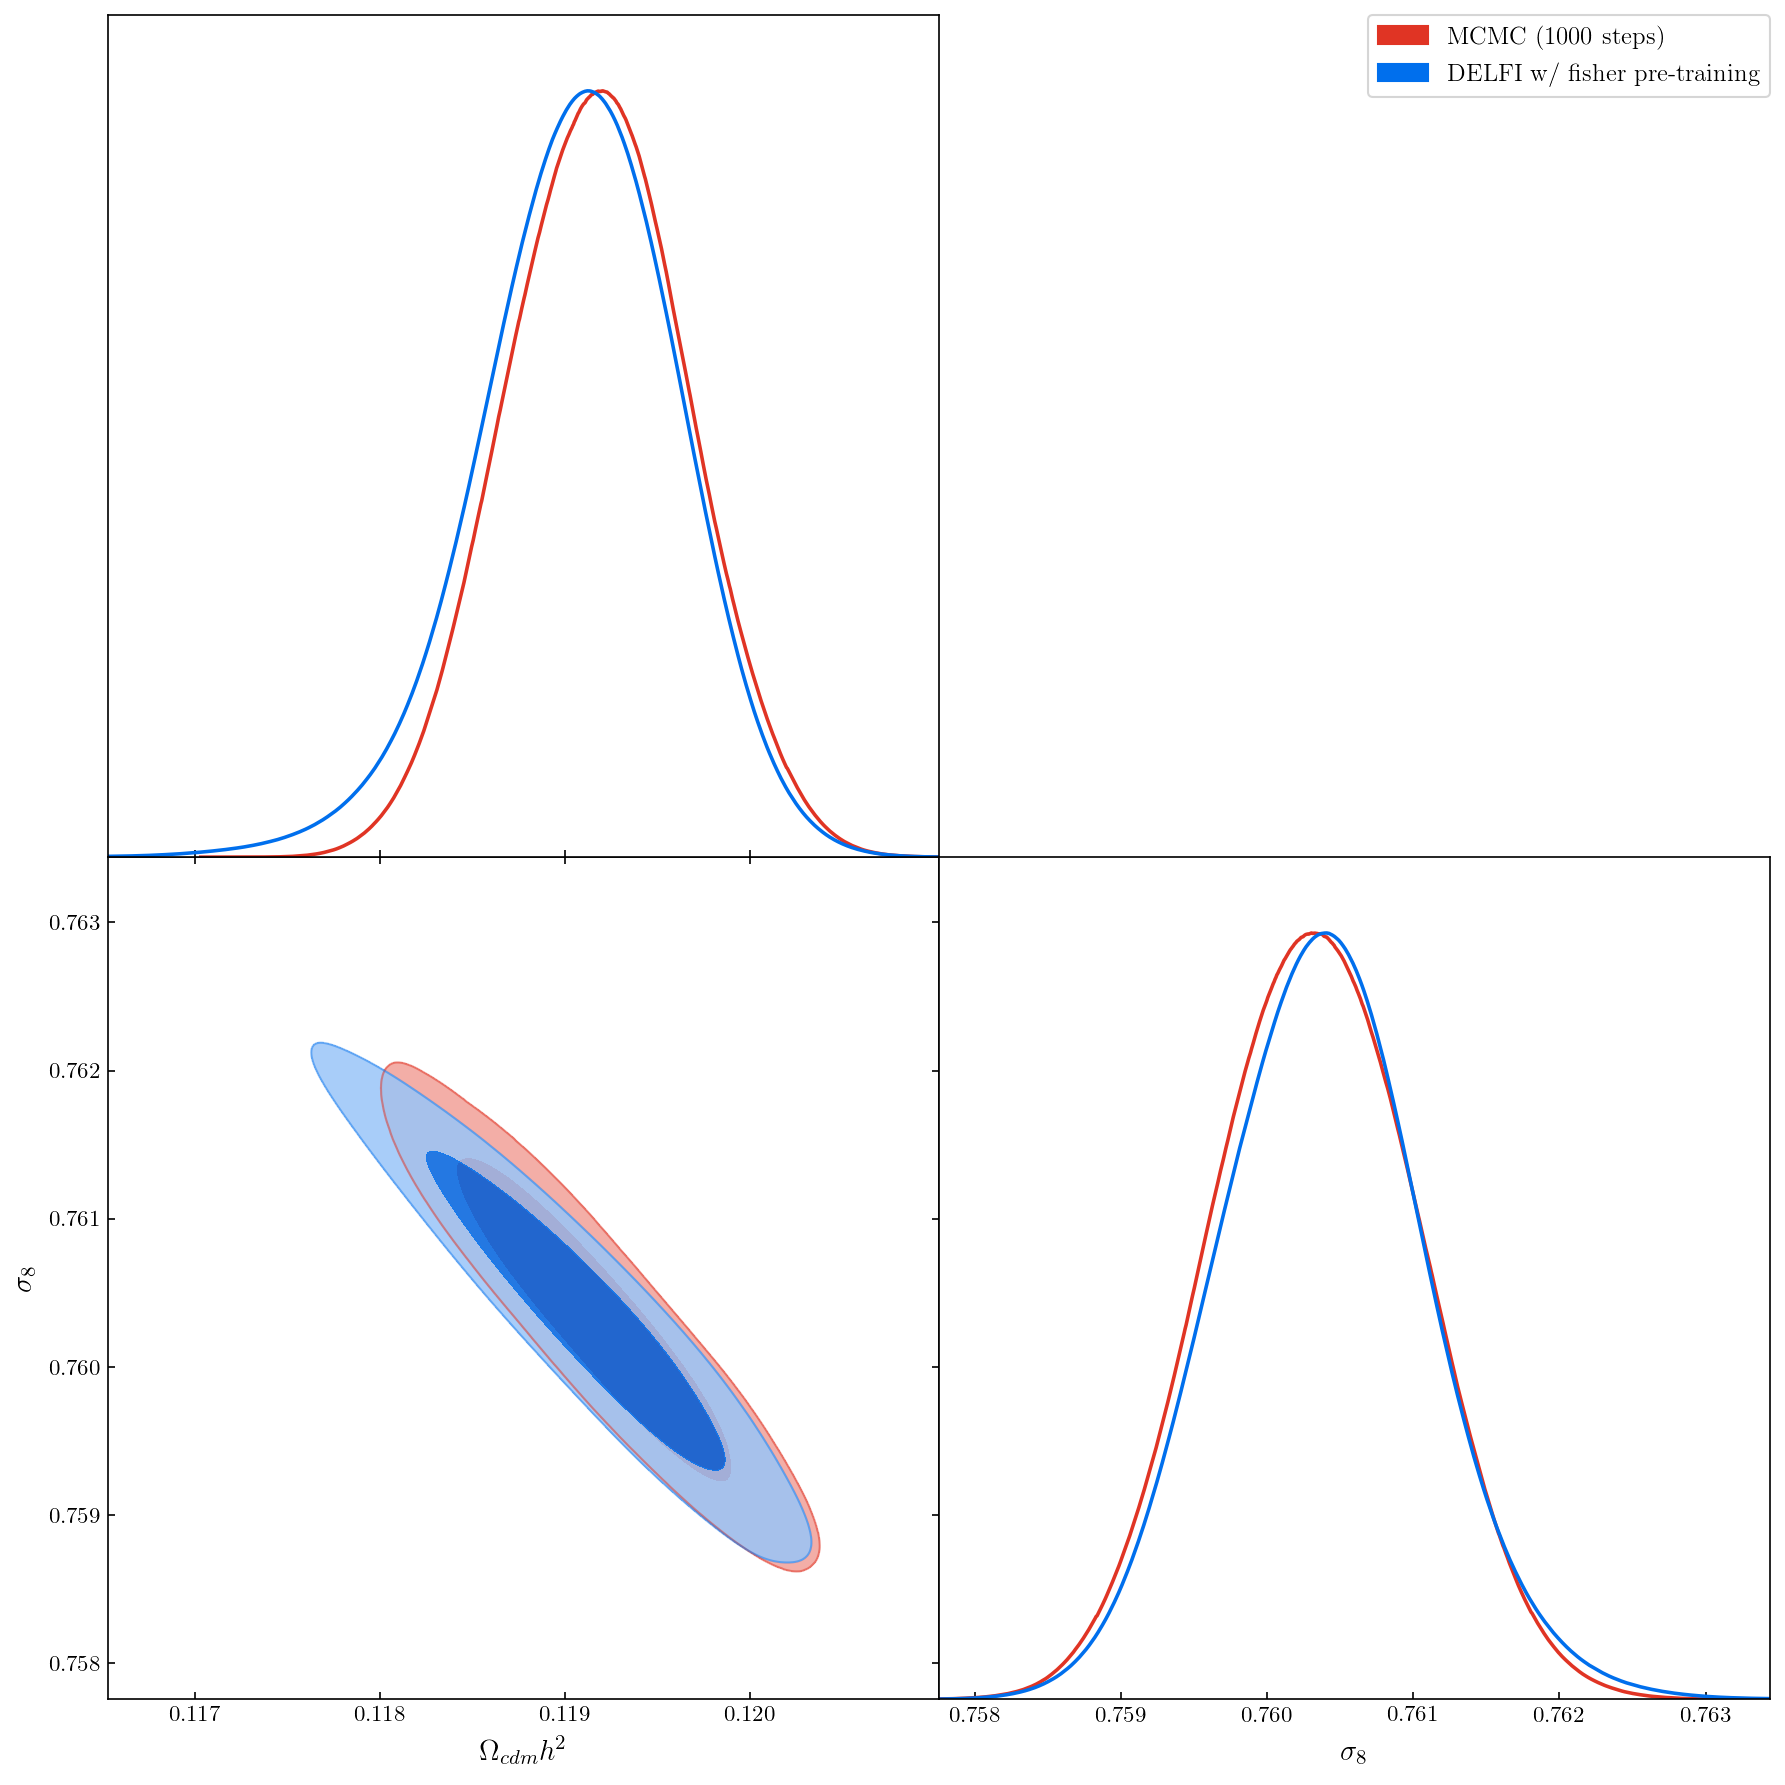

In [103]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_fisher_s[0]], 
                legend_labels = ['MCMC (1000 steps)','DELFI w/ fisher pre-training'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

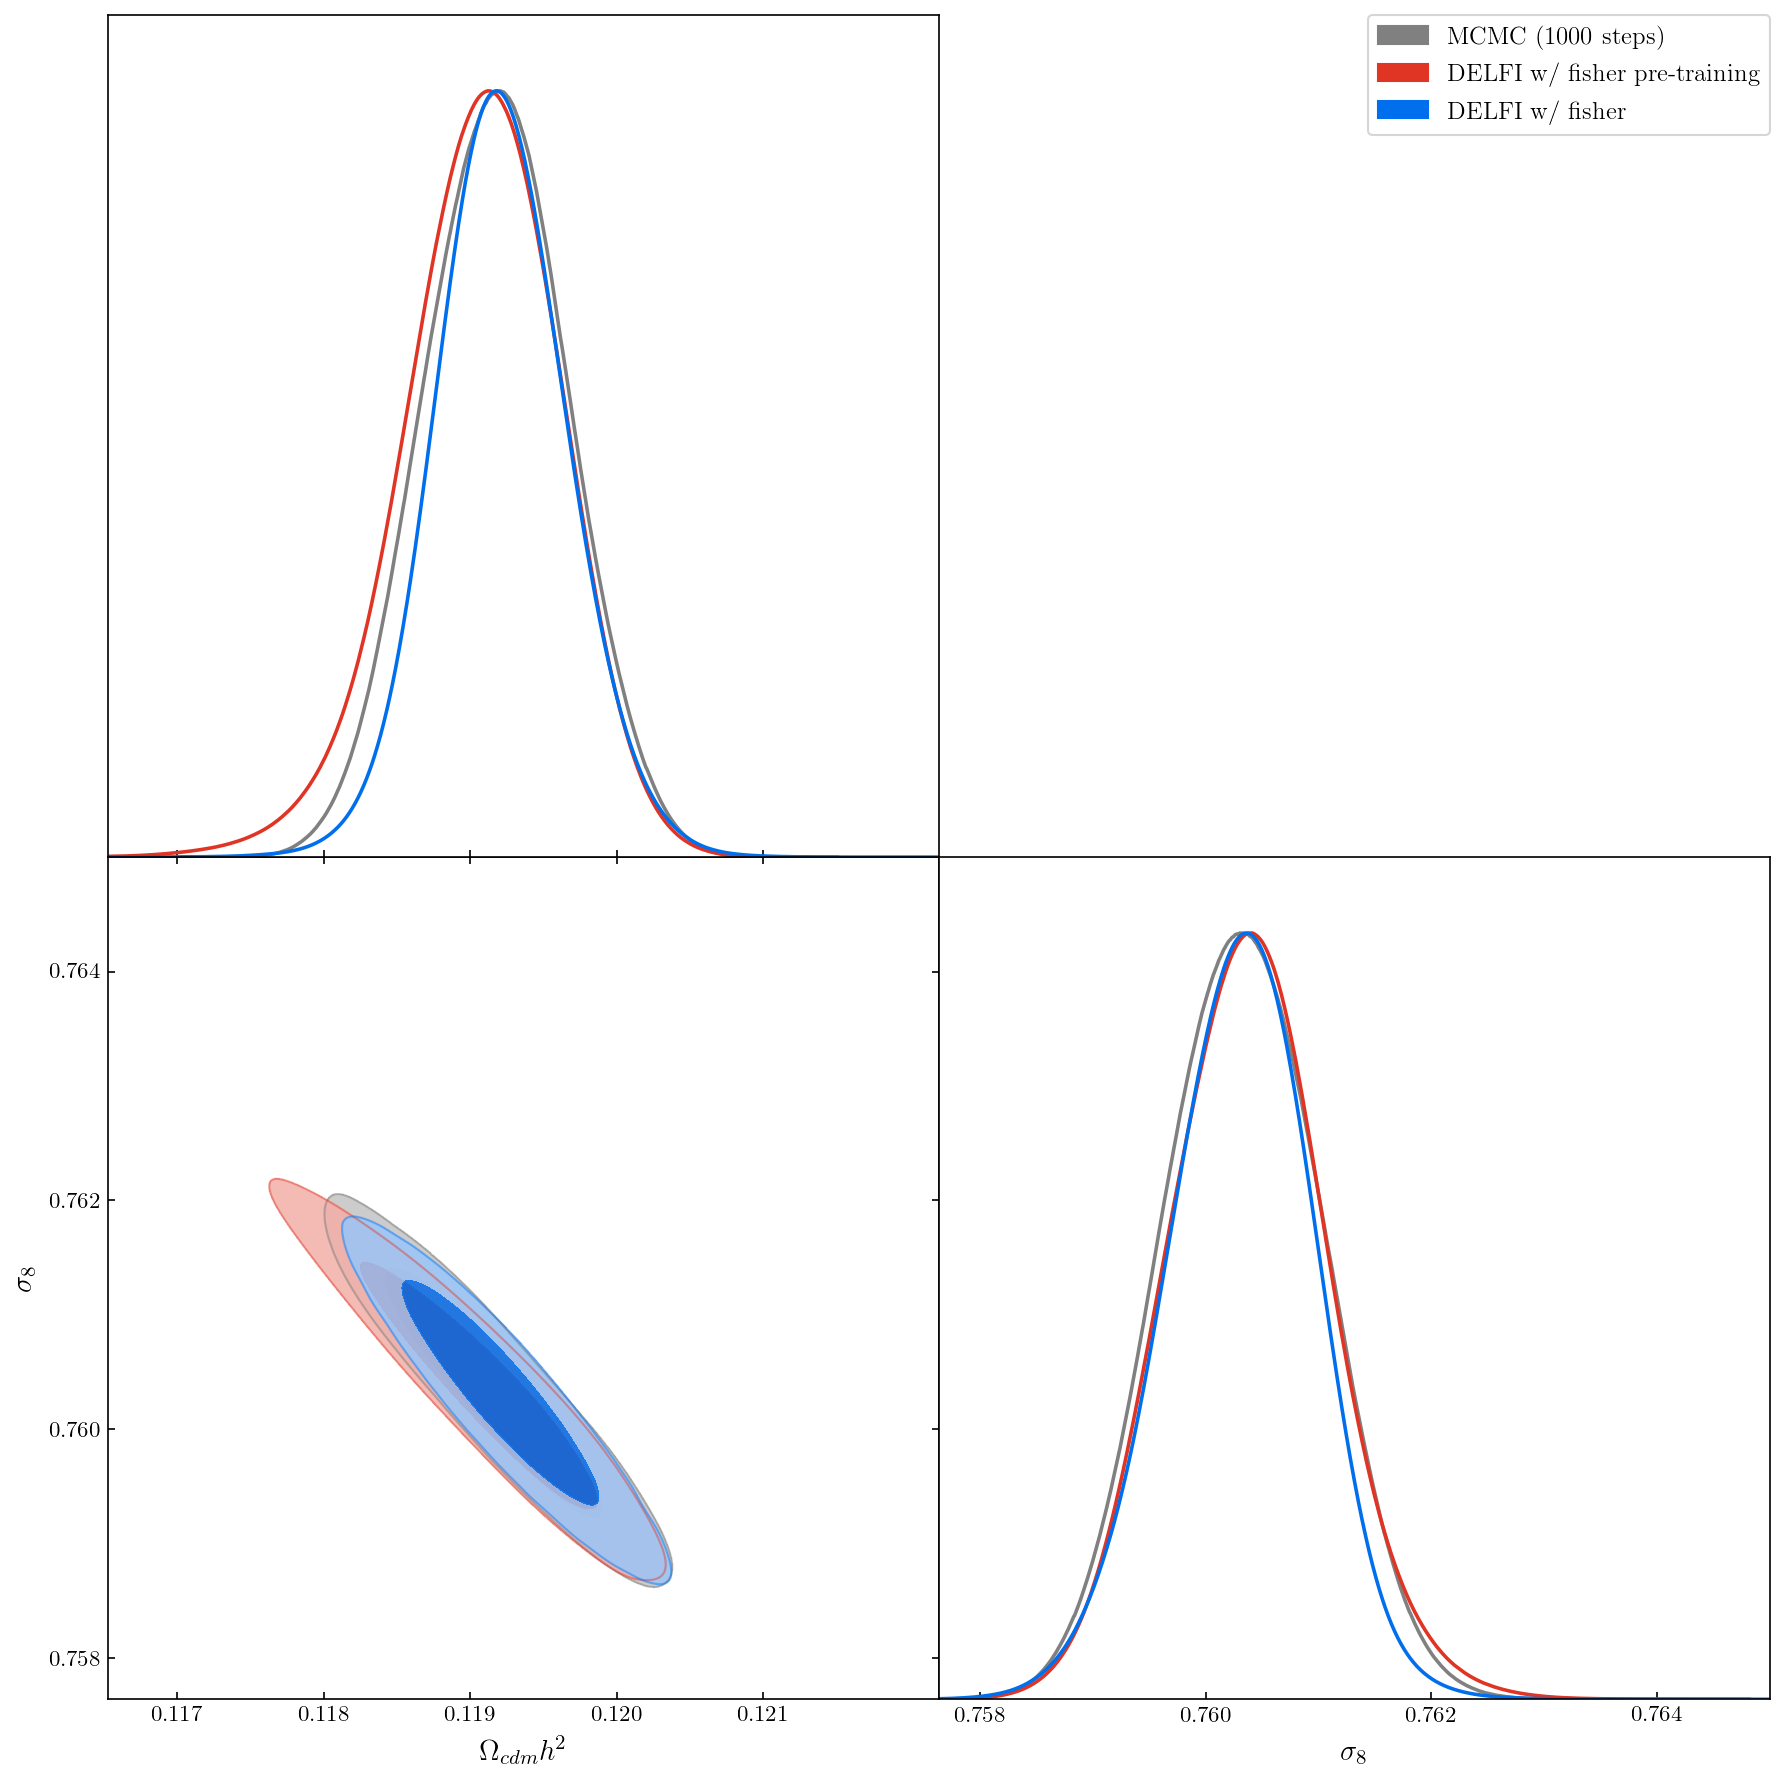

In [102]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_fisher_s[0], delfi_samples_s_fisher_covmat[0]], 
                legend_labels = ['MCMC (1000 steps)','DELFI w/ fisher pre-training', 
                                 'DELFI w/ fisher'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)